In [1]:
import sys
if '..' not in sys.path:
    sys.path.insert(0, "..")

from importnb import imports
with imports("ipynb"):
    from common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        print_feature_outliers,
        remove_outliers,
        generate_numerical_eda_visualization,
        generate_categorical_count_visualization,
        generate_numerical_heatmap,
        generate_numerical_categorical_heatmap,
        generate_numerical_vs_categorical_eda_visualization,
        generate_kprototype_clusters,
        generate_decision_tree_classifier,
        generate_confusion_matrix,
        generate_decision_tree
    )

# Exploratory Data Analysis
- Objective: Perform EDA on dataset while ensure that all function is working fine
- Motivation of Analysis: The type course catergory will impact the number of subscribers, price and average rating 

In [2]:
DatasetRaw = load_dataset("../../dataset")
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  int64         
 1   title               209734 non-null  string        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float64       
 4   headline            209707 non-null  string        
 5   num_subscribers     209734 non-null  int64         
 6   avg_rating          209734 non-null  float64       
 7   num_reviews         209734 non-null  int64         
 8   num_comments        209734 non-null  int64         
 9   num_lectures        209734 non-null  int64         
 10  content_length_min  209734 non-null  int64         
 11  published_time      209734 non-null  object        
 12  last_update_date    209597 non-null  datetime64[ns]
 13  category            209734 no

In [3]:
parameters = load_parameters(".")

In [4]:
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters)
CleanUpDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166104 entries, 0 to 166103
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               166104 non-null  float64 
 1   num_subscribers     166104 non-null  int64   
 2   avg_rating          166104 non-null  float64 
 3   num_lectures        166104 non-null  int64   
 4   content_length_min  166104 non-null  int64   
 5   category            166104 non-null  category
 6   subcategory         166104 non-null  category
 7   language            166104 non-null  category
 8   instructor_name     166104 non-null  category
dtypes: category(4), float64(2), int64(3)
memory usage: 10.2 MB


In [5]:
CleanUpDataset.describe()

,price,num_subscribers,avg_rating,num_lectures,content_length_min
count,166104.000000,1.661040e+05,166104.000000,166104.000000,166104.000000
mean,97.887084,2.855176e+03,3.915862,40.322256,291.628967
std,120.408860,1.506008e+04,1.352376,55.300467,471.545984
min,11.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,24.000000,3.000000e+01,3.900000,13.000000,79.000000
50%,49.990000,1.850000e+02,4.350000,25.000000,156.000000
75%,129.900000,1.216000e+03,4.650000,47.000000,323.000000
max,999.990000,1.612862e+06,5.000000,1095.000000,21353.000000


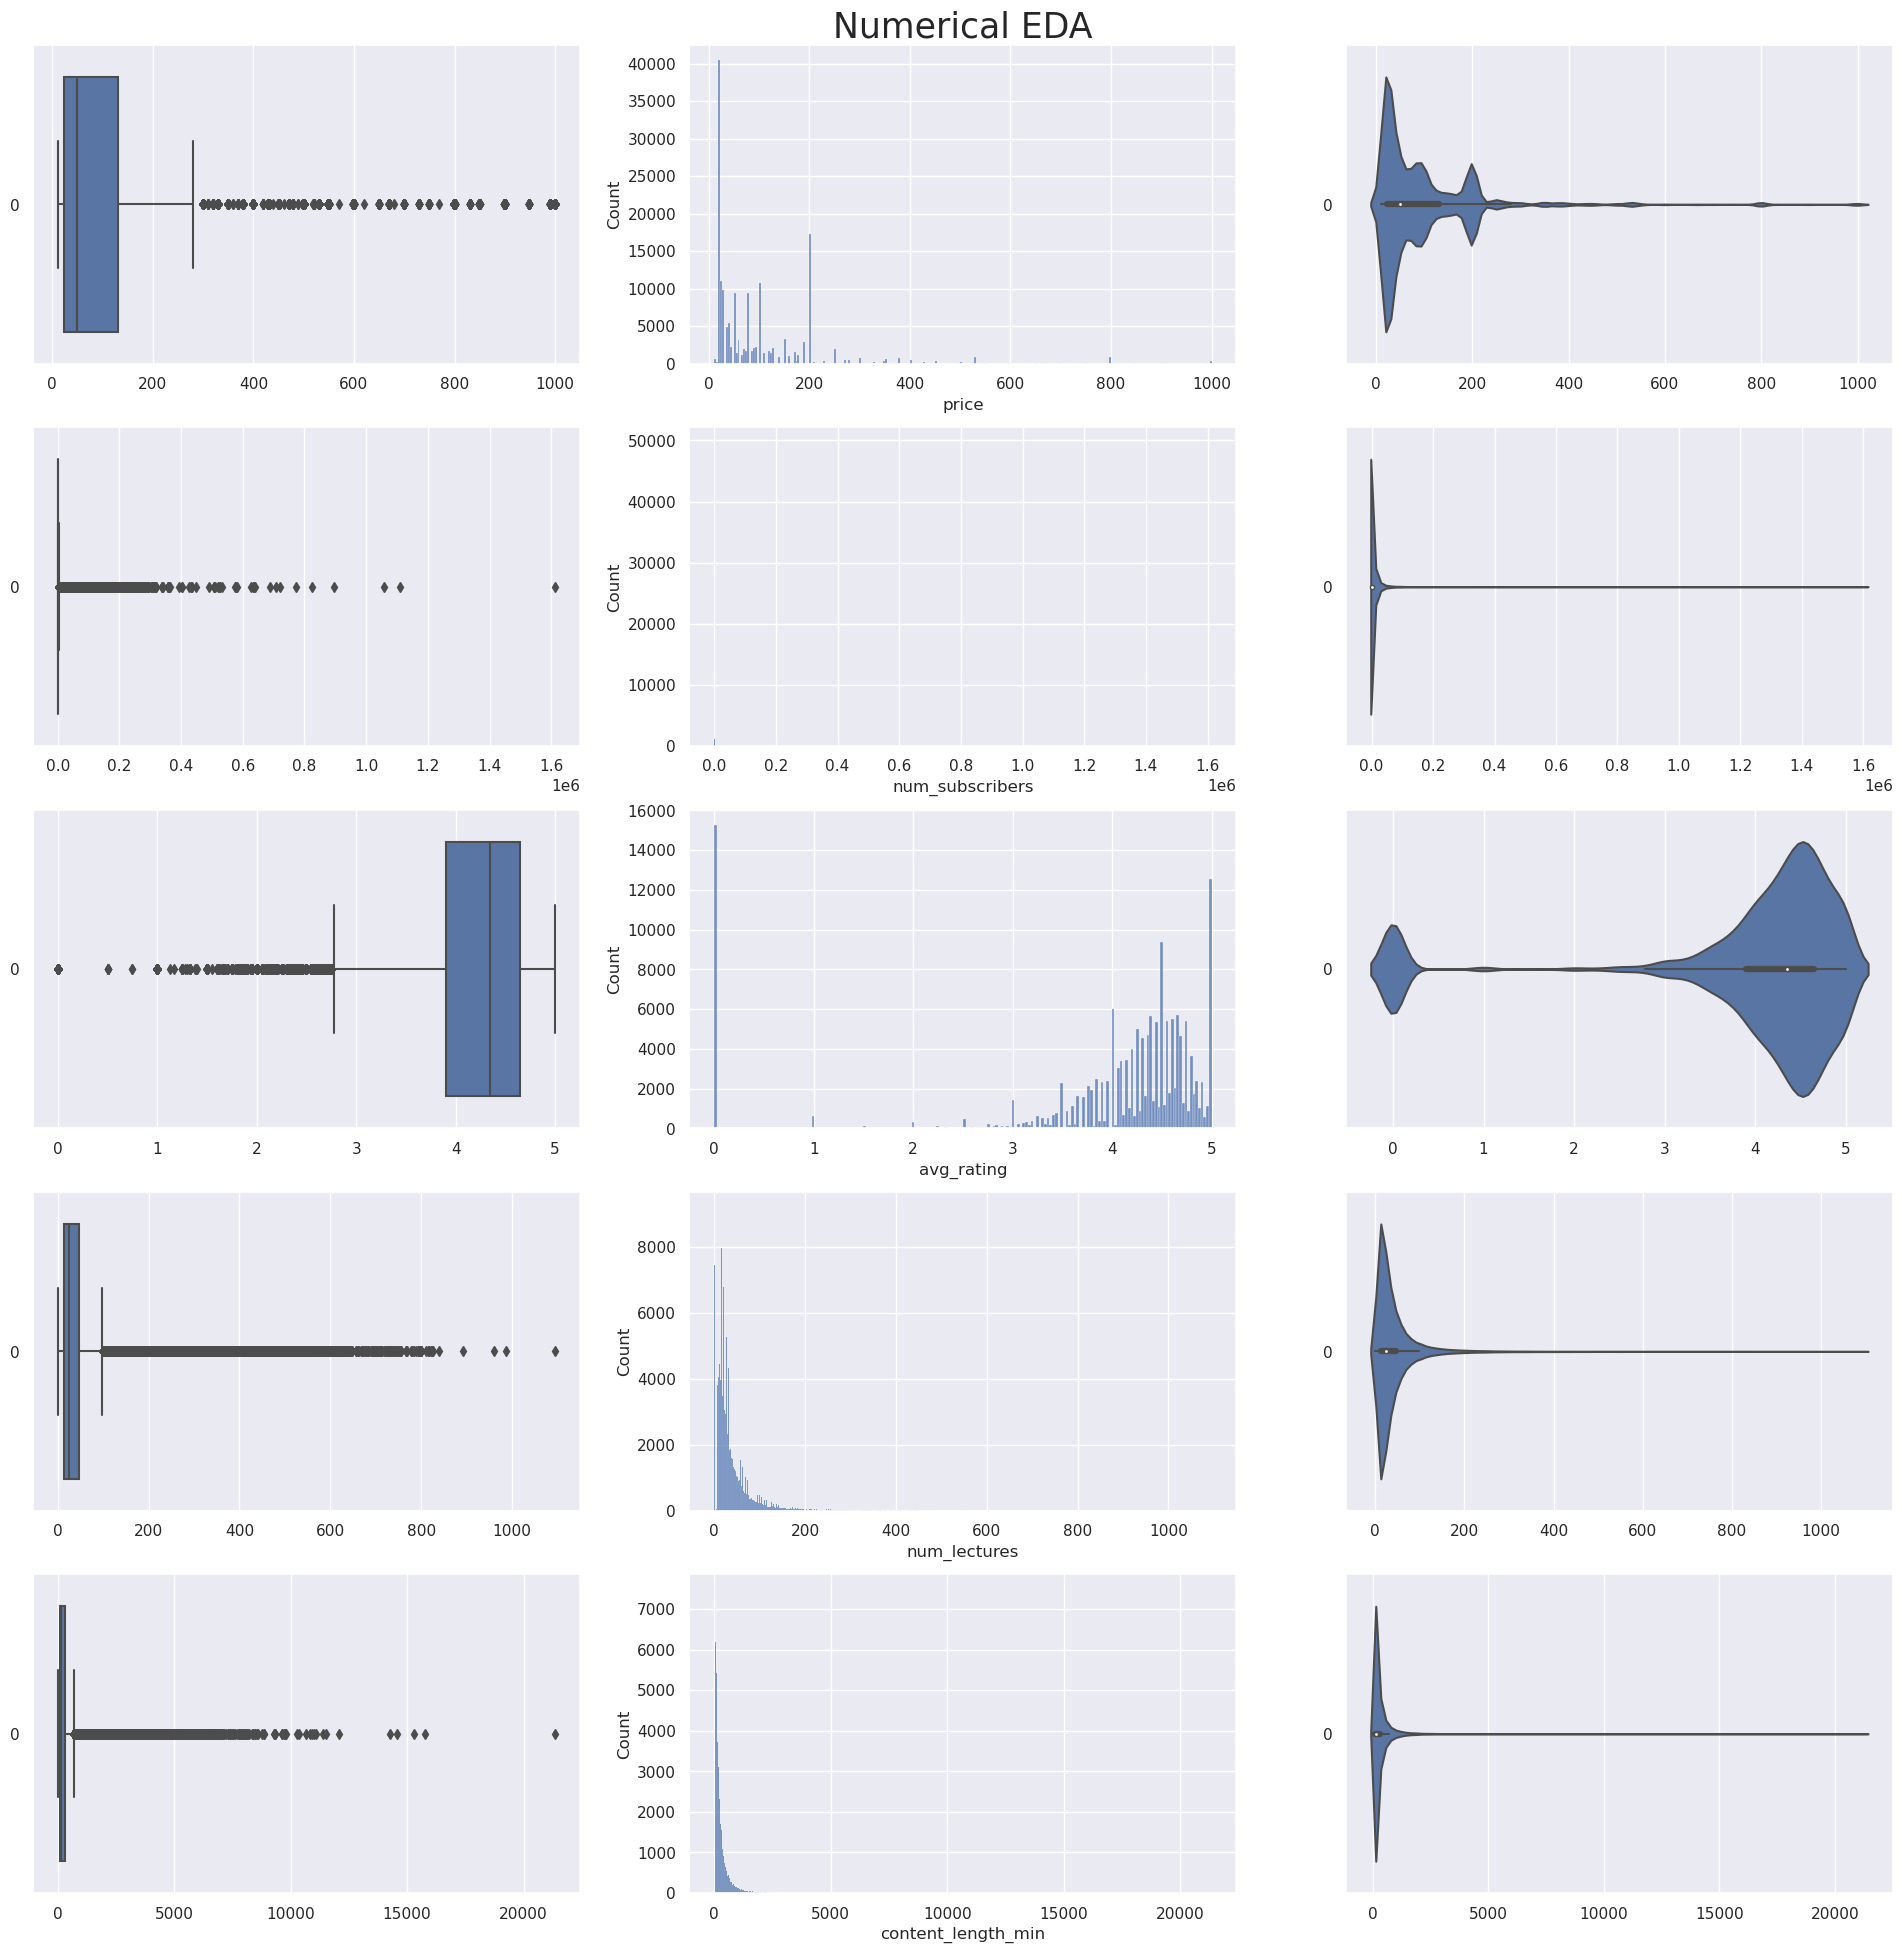

In [6]:
generate_numerical_eda_visualization(CleanUpDataset, "Numerical EDA")

In [7]:
print_feature_outliers(CleanUpDataset)

[price] total outliers: 7309
[num_subscribers] total outliers: 24966
[avg_rating] total outliers: 17859
[num_lectures] total outliers: 13062
[content_length_min] total outliers: 14640


In [8]:
RemovedOutlierDataset = remove_outliers(CleanUpDataset)
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106240 entries, 0 to 106239
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               106240 non-null  float64 
 1   num_subscribers     106240 non-null  int64   
 2   avg_rating          106240 non-null  float64 
 3   num_lectures        106240 non-null  int64   
 4   content_length_min  106240 non-null  int64   
 5   category            106240 non-null  category
 6   subcategory         106240 non-null  category
 7   language            106240 non-null  category
 8   instructor_name     106240 non-null  category
dtypes: category(4), float64(2), int64(3)
memory usage: 7.4 MB


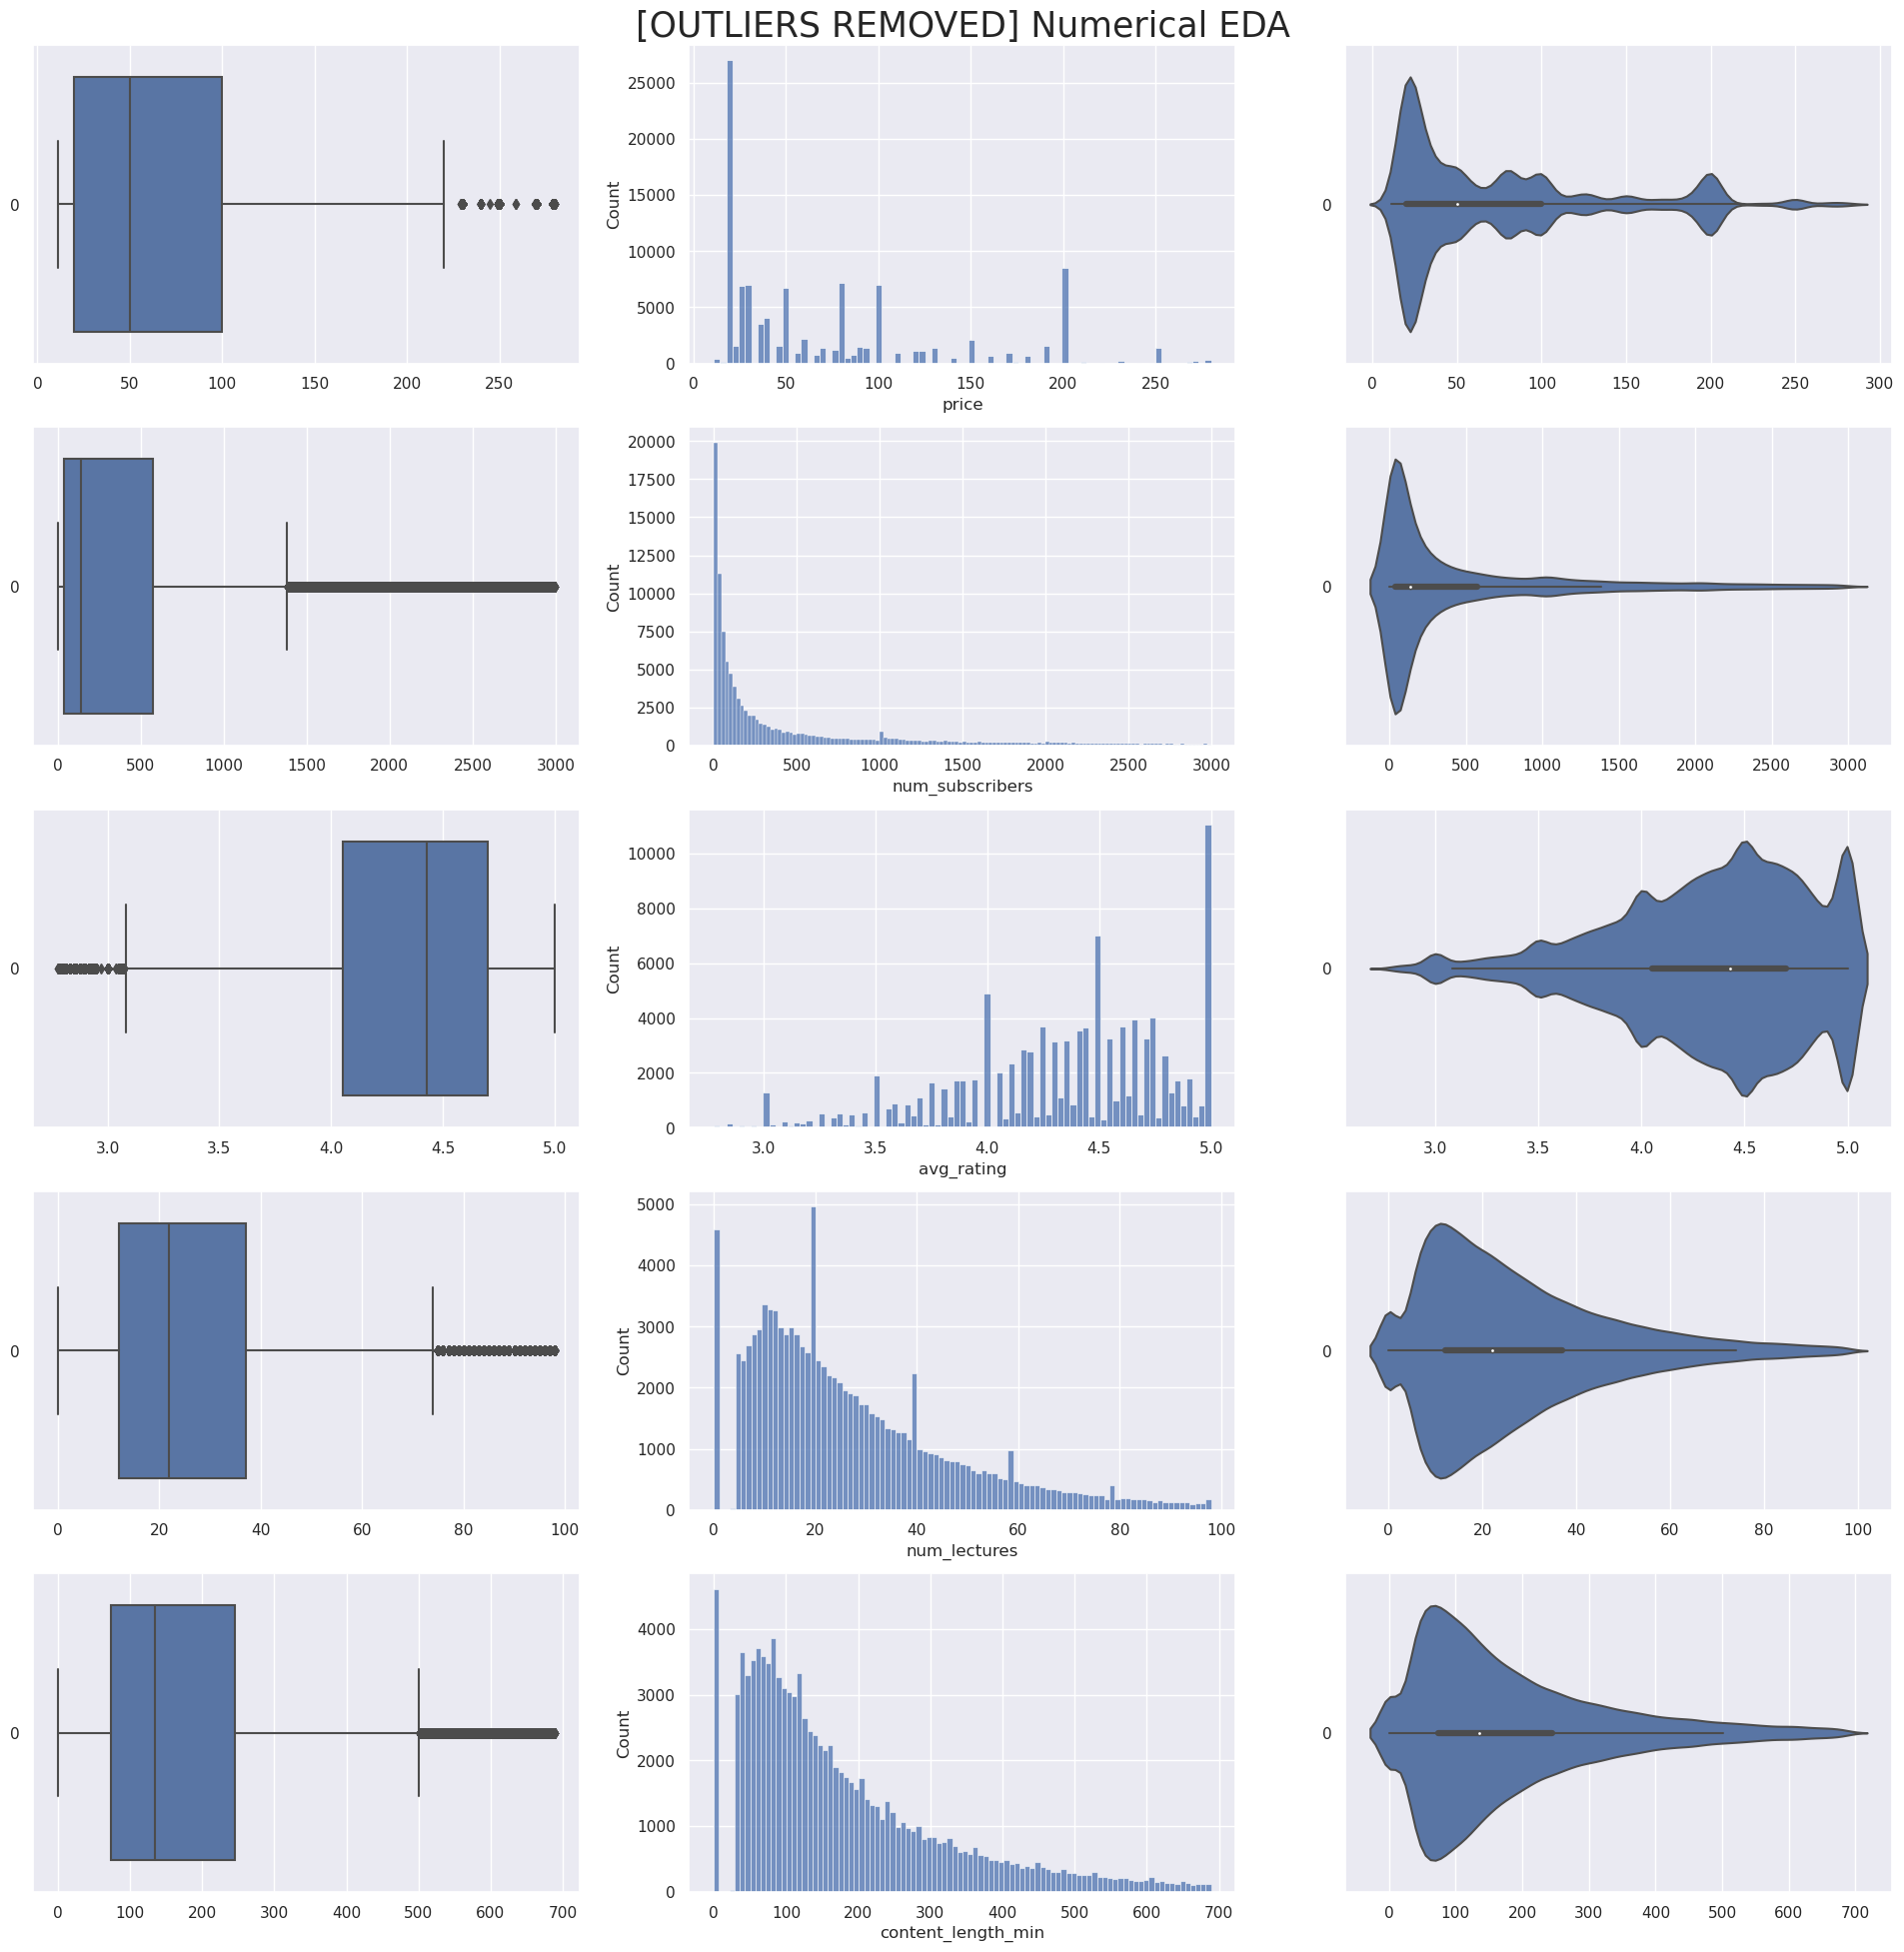

In [9]:
generate_numerical_eda_visualization(RemovedOutlierDataset, "[OUTLIERS REMOVED] Numerical EDA")

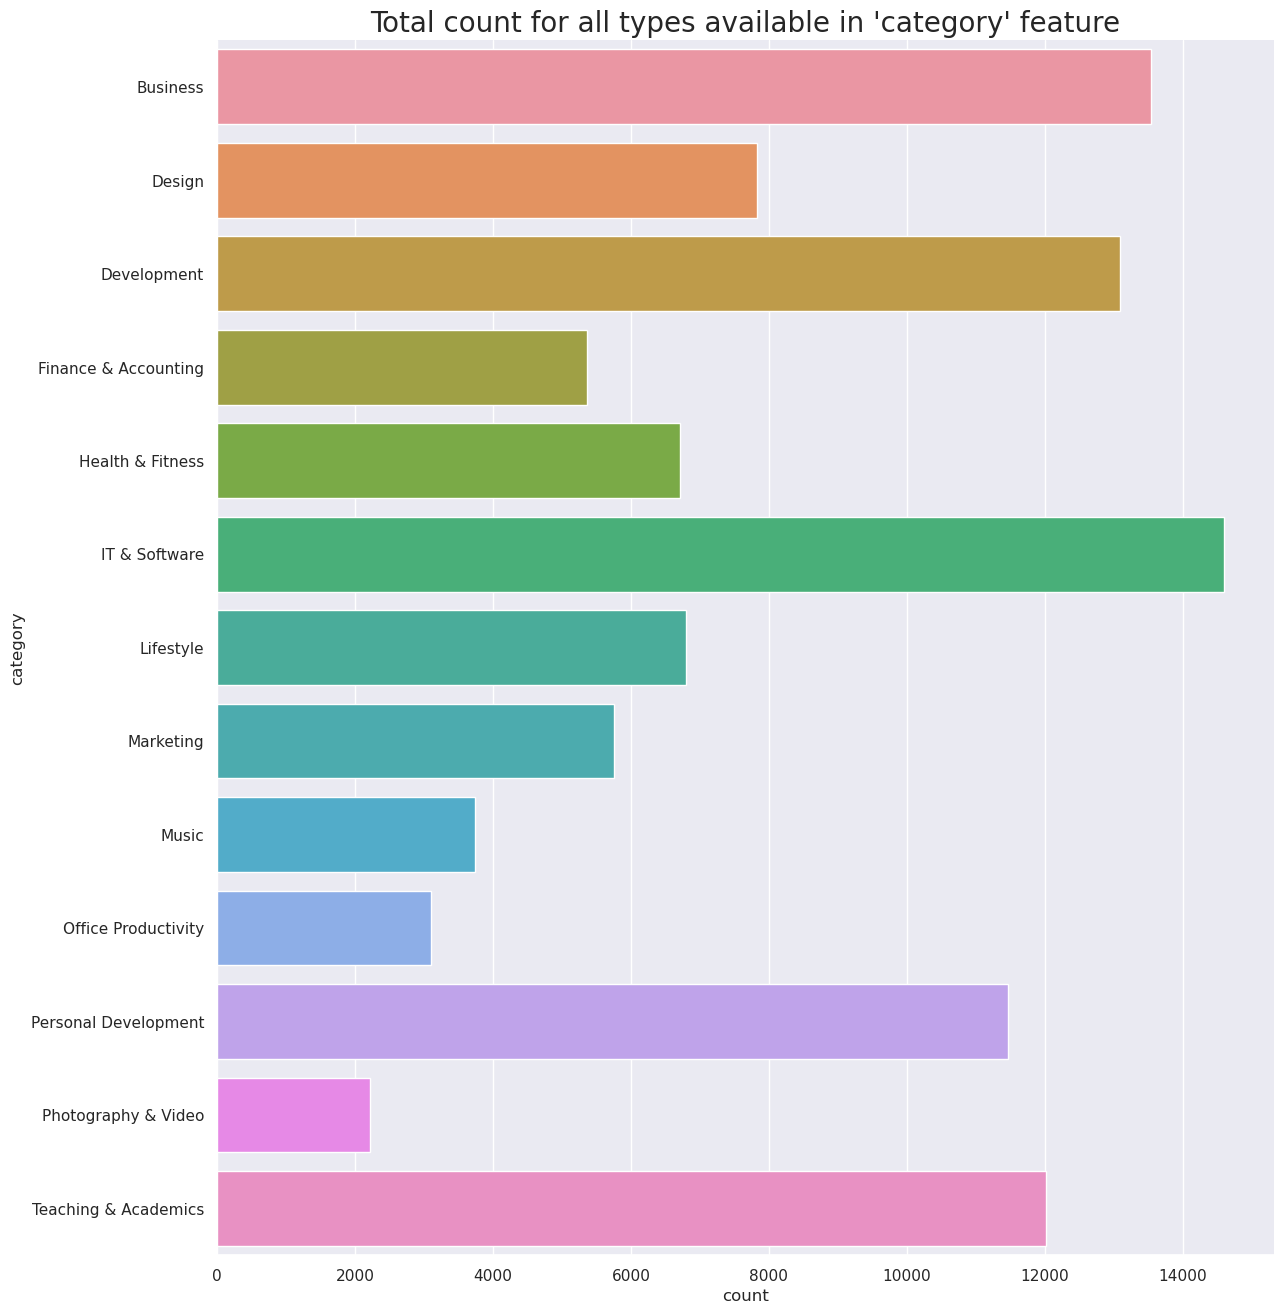

In [10]:
generate_categorical_count_visualization(RemovedOutlierDataset, parameters)

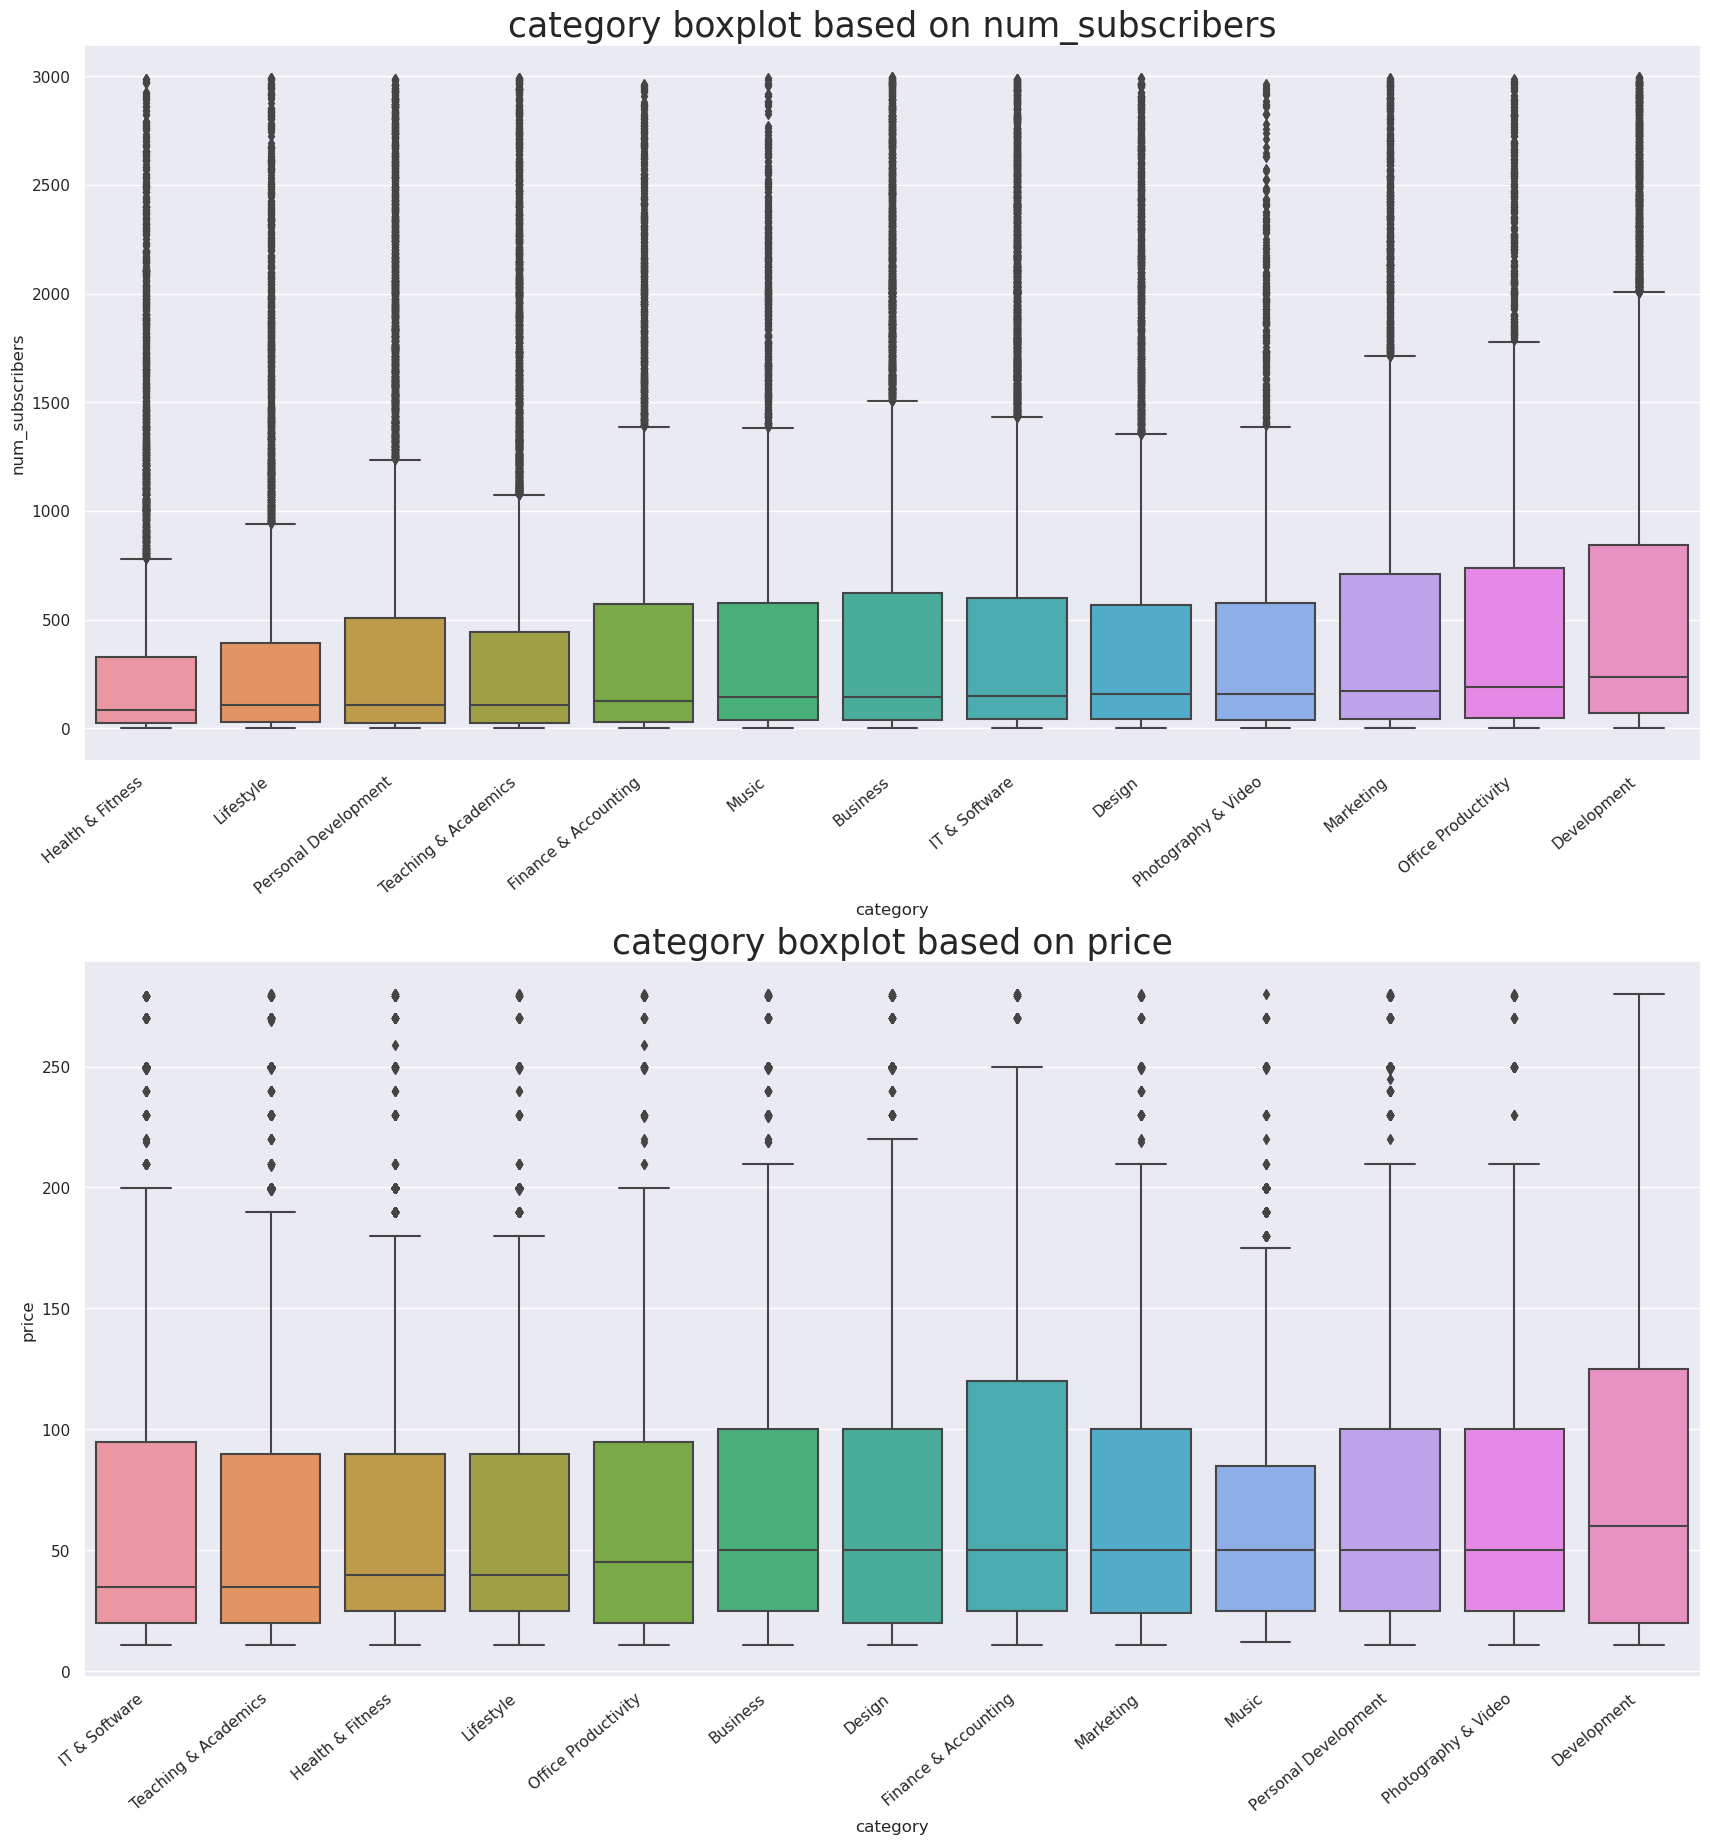

In [11]:
generate_numerical_vs_categorical_eda_visualization(RemovedOutlierDataset, parameters, '[UNION outliers removed] num_subscriber VS category')

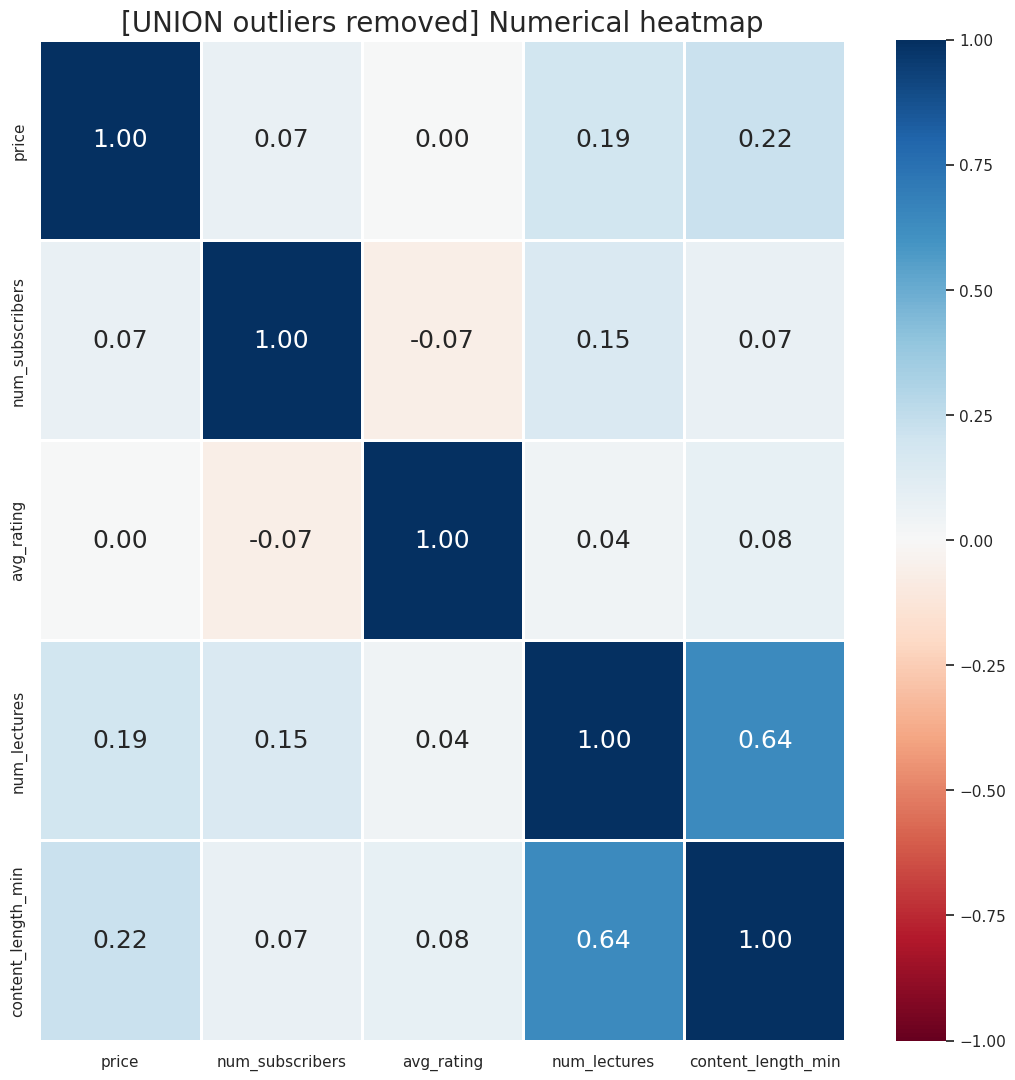

In [12]:
generate_numerical_heatmap(RemovedOutlierDataset, "[UNION outliers removed] Numerical heatmap")

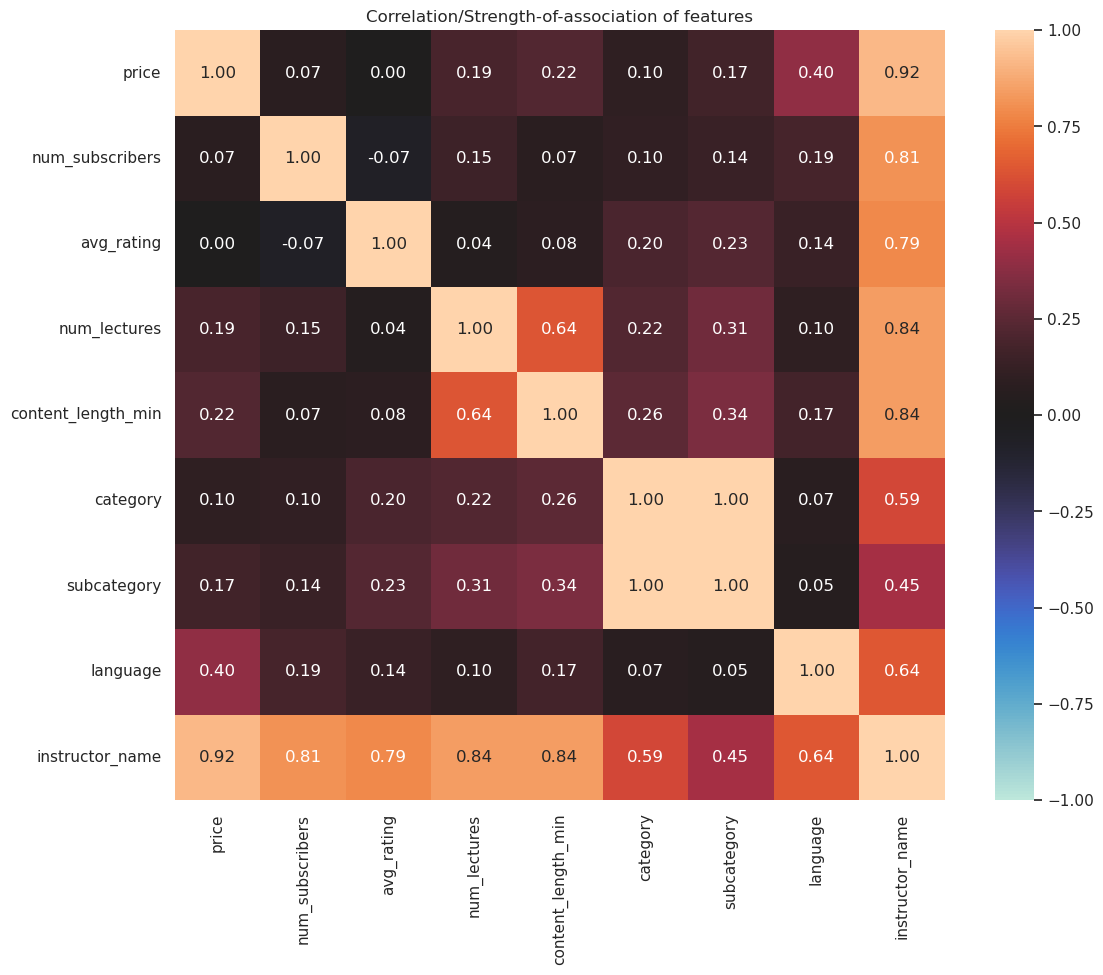

In [13]:
generate_numerical_categorical_heatmap(RemovedOutlierDataset)

In [14]:
AddClusterDataset, cluster_ids = generate_kprototype_clusters(RemovedOutlierDataset, parameters)

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 30612, ncost: 2006250385.527346
Run: 1, iteration: 2/100, moves: 13046, ncost: 1794617766.1999362
Run: 1, iteration: 3/100, moves: 6168, ncost: 1724674759.4607952
Run: 1, iteration: 4/100, moves: 3654, ncost: 1691606480.4535592
Run: 1, iteration: 5/100, moves: 2820, ncost: 1671561250.4734635
Run: 1, iteration: 6/100, moves: 2508, ncost: 1656729216.5309305
Run: 1, iteration: 7/100, moves: 2743, ncost: 1646713913.8474858
Run: 1, iteration: 8/100, moves: 3169, ncost: 1638646705.7895665
Run: 1, iteration: 9/100, moves: 3500, ncost: 1630539956.6390429
Run: 1, iteration: 10/100, moves: 3467, ncost: 1623075486.059483
Run: 1, iteration: 11/100, moves: 3736, n

In [15]:
AddClusterDataset.head(10)

,instructor_name,price,num_subscribers,avg_rating,num_lectures,content_length_min,cluster_id
0,Angela Poch,19.99,1713,4.40,14,82,13
1,Juan Jose Ramos,99.99,483,4.65,73,373,0
2,Infinite Skills,49.99,2058,3.65,81,459,2
3,Joseph Caserto,24.99,2069,4.10,53,359,2
4,Nicole Hennig,89.99,388,3.60,64,178,1
5,Chris Kinch,44.99,880,4.20,26,141,6
6,Michael Geer,19.99,132,3.25,14,60,8
7,Marina Petrovic,49.99,122,4.45,64,273,10
8,Mepi.pl Video Tutorials,179.99,1276,4.00,59,553,9
9,Infinite Skills,49.99,741,4.35,81,518,3


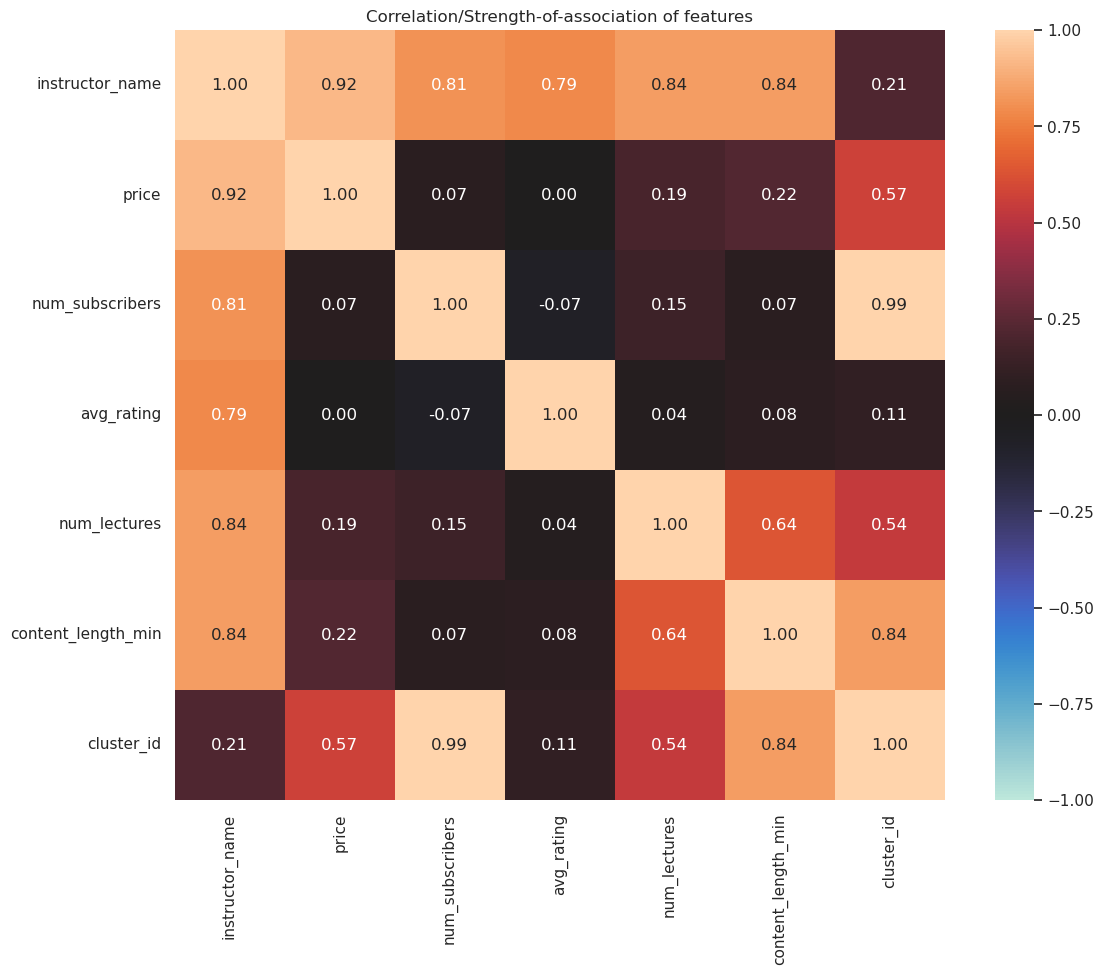

In [16]:
generate_numerical_categorical_heatmap(AddClusterDataset)

In [17]:
decision_tree_classier = generate_decision_tree_classifier(AddClusterDataset, parameters)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7155614646084337

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7160673945783133



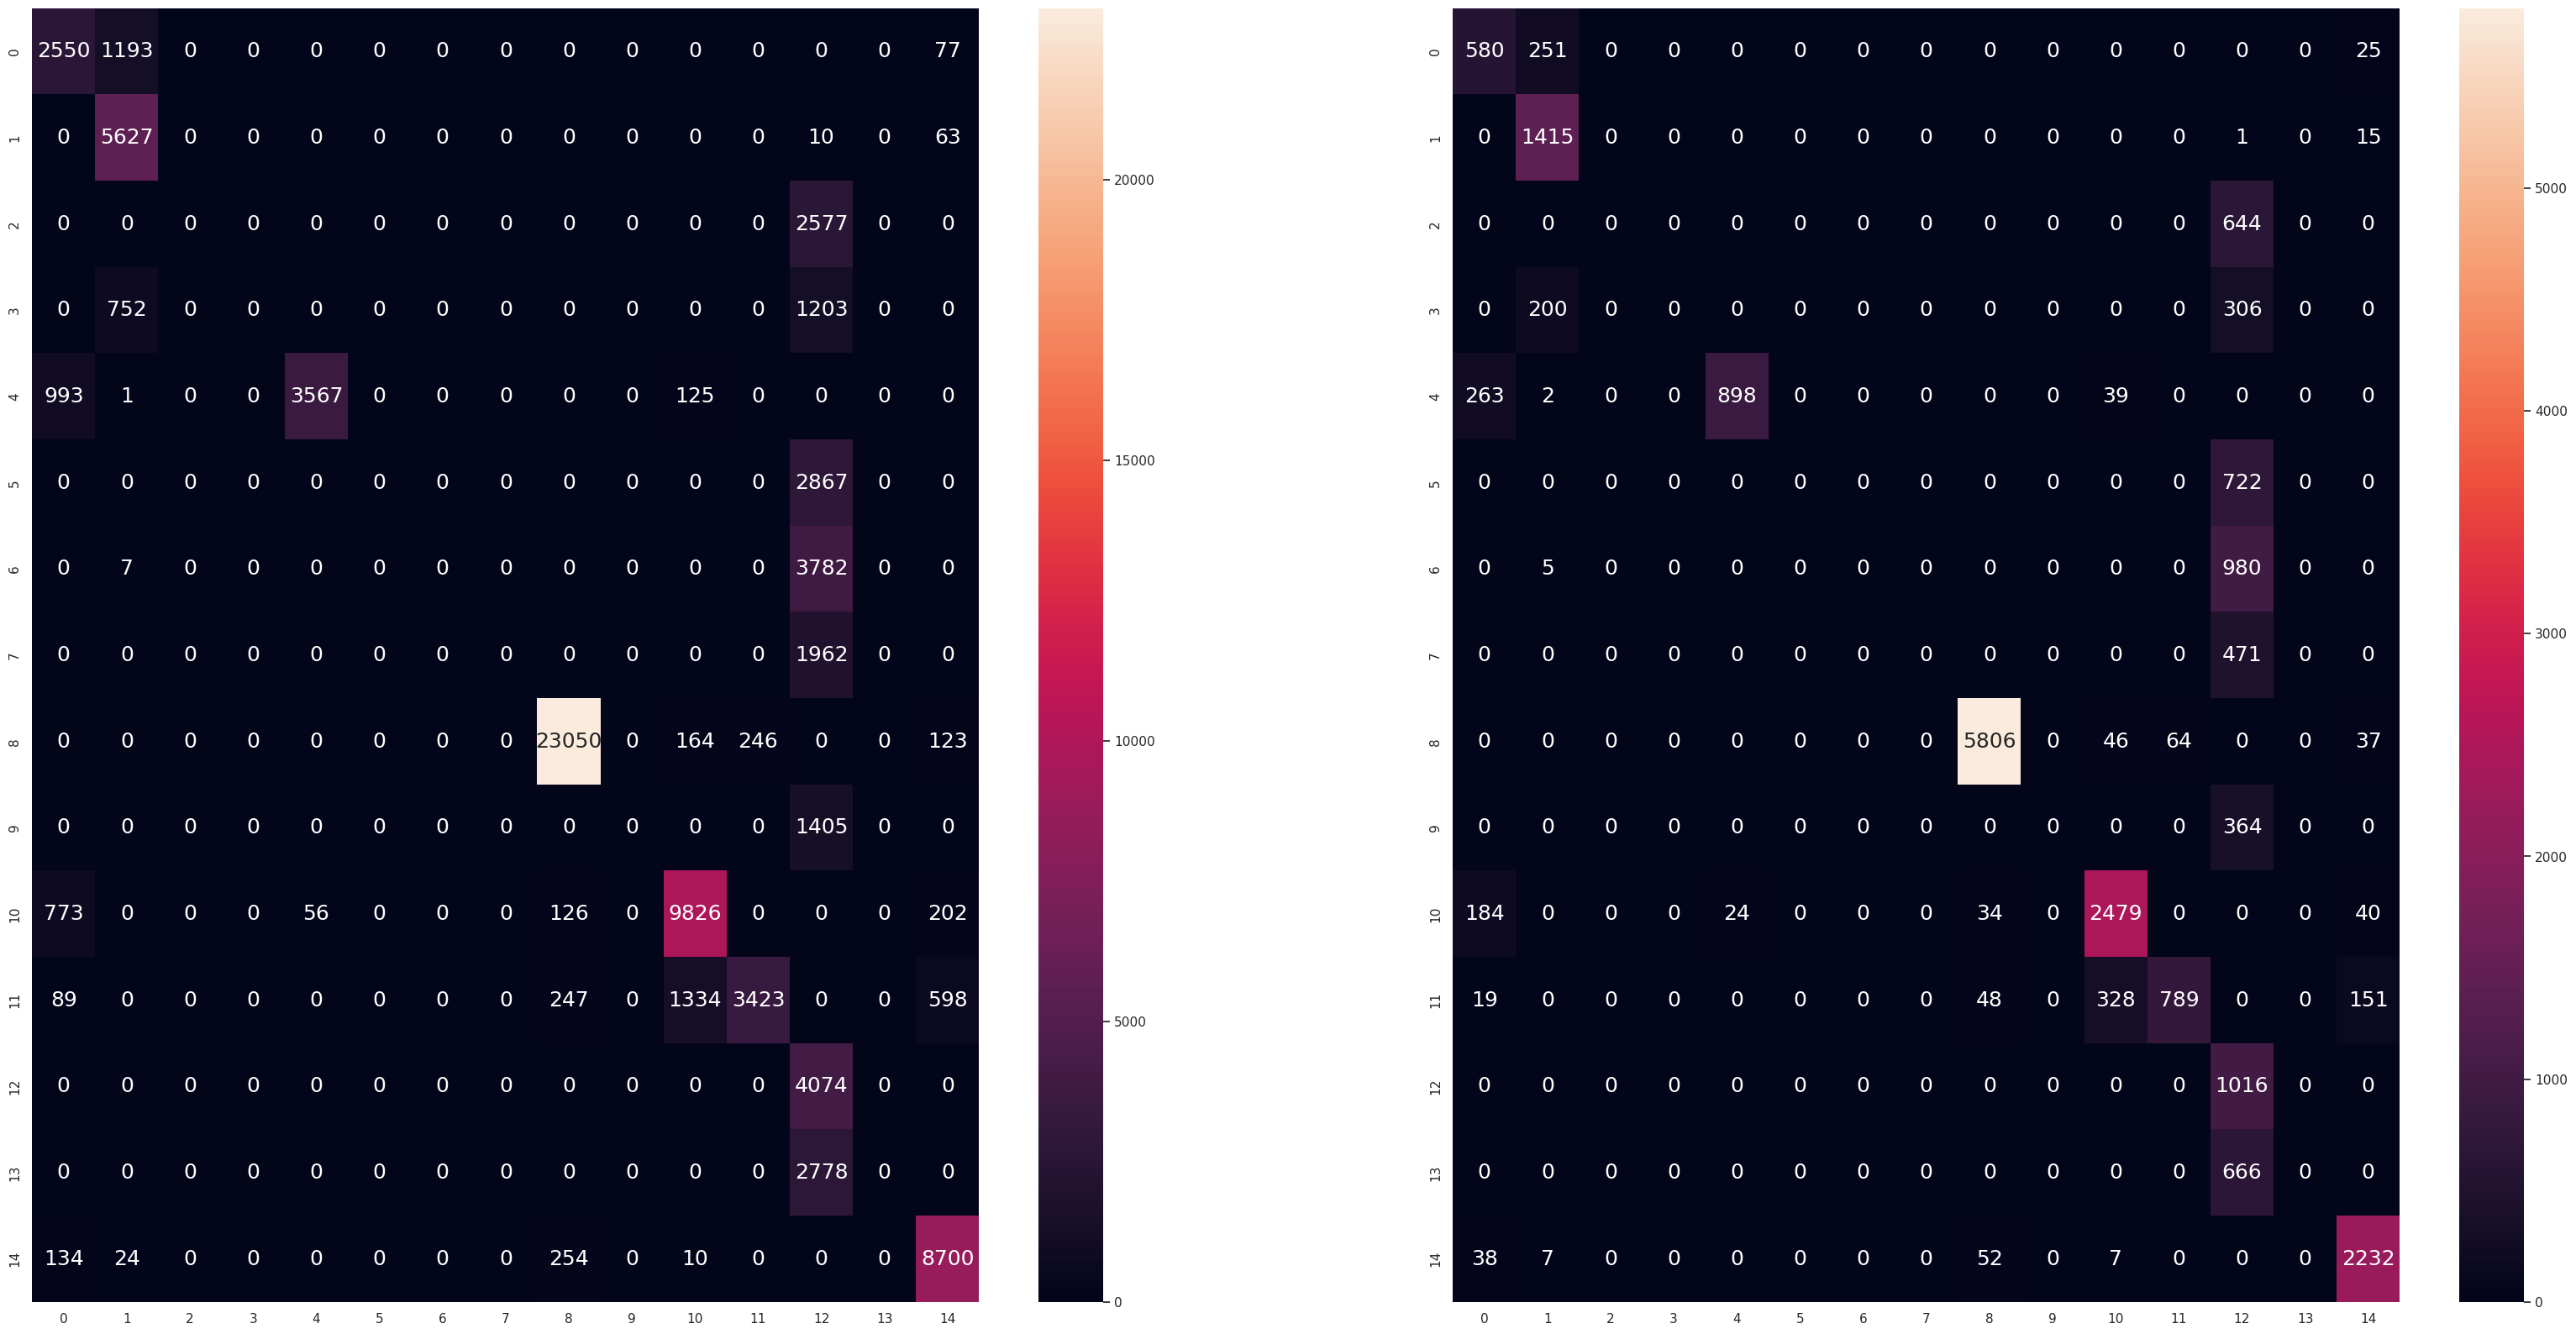

In [18]:
generate_confusion_matrix(decision_tree_classier)

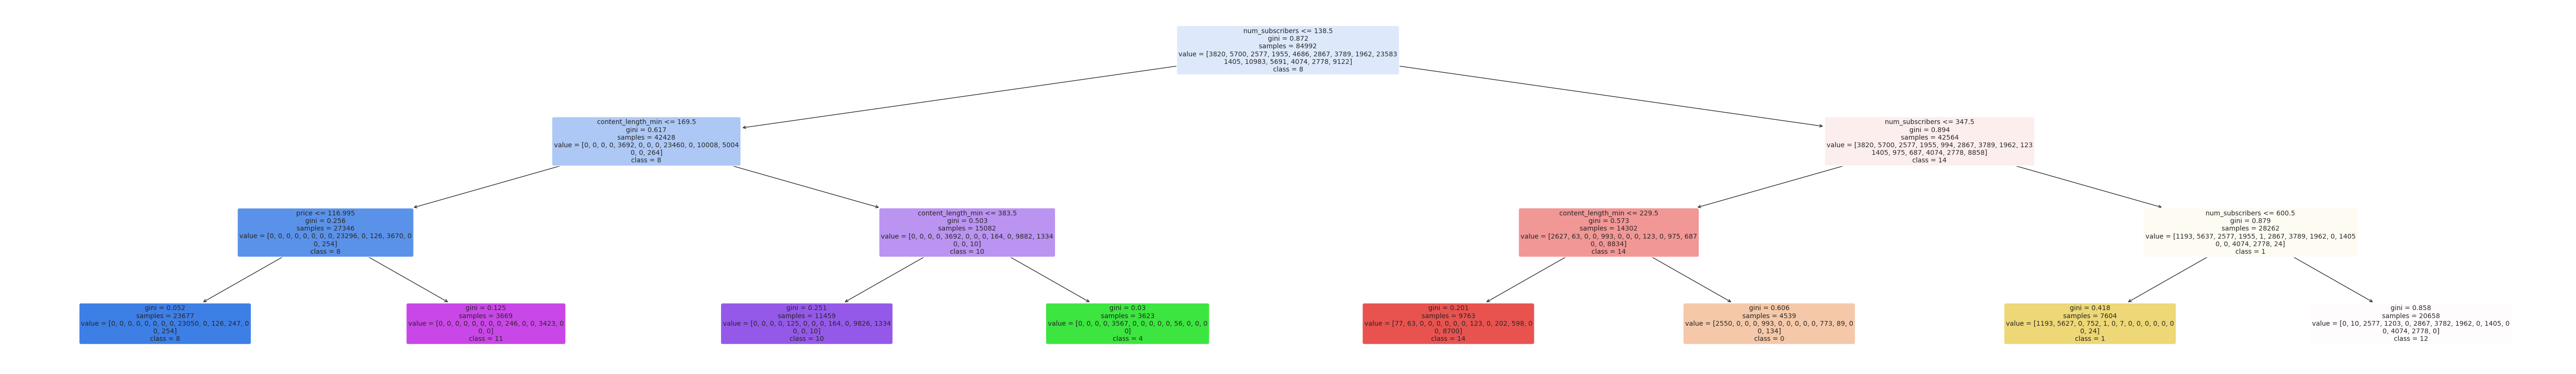

In [19]:
generate_decision_tree(decision_tree_classier, parameters, cluster_ids)